# Astro 9

# Lecture 7: Introduction to Pandas

**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.  
**Get Data** - We will learn how to read in the text file. The data consist of baby names and the number of baby names born in the year 1880.  
**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.  
**Analyze Data** - We will simply find the most popular name in a specific year.  

> The ***pandas*** library is used for all the data analysis excluding a small piece of the data presentation section. The ***matplotlib*** library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.0.3
Matplotlib version 3.7.2


# Create Data  

The data set will consist of 5 baby names and the number of births recorded for that year (1880).

In [4]:
# The inital set of baby names and birth rates
first_names = ['Bob','Jessica','Mary','John','Mel']
#last_name = ['Hope', 'Drew', 'Poppins', 'Lennon', 'Brooks']
births = [968, 155, 77, 578, 973]

print (first_names[2])

Mary


To merge these two lists together we will use the ***zip*** function.

In [6]:
#Babydata = {'names': names, 'count': births}
BabyDataSet = list((zip(first_names,births)))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

We are basically done creating the data set. We now will use the ***pandas*** library to export this data set into a csv file. 

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [8]:
df = pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [9]:
names=df['Names'].to_list()
names

['Bob', 'Jessica', 'Mary', 'John', 'Mel']

Export the dataframe to a ***csv*** file. We can name the file ***births1880.csv***. The function ***to_csv*** will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

The only parameters we will use is ***index*** and ***header***. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [10]:
df.to_csv('births1880.csv',index=True,header=True)

## Get Data

To pull in the csv file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.

Even though this functions has many parameters, we will simply pass it the location of the text file.  

Location = births1880.csv  

***Note:*** Depending on where you save your notebooks, you may need to modify the location above.  

In [11]:
Location = r'births1880.csv'
df2 = pd.read_csv(Location,index_col=0)

Notice the ***r*** before the string. Since the slashes are special characters but are used to separate folders in a path on Windows, prefixing the string with a ***r*** will ensure that the file name is read correctly on any OS  

In [12]:
df2

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


The ***read_csv*** function treated the first record in the csv file as the header names. If the file has no header, we can pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the ***index*** of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.  

***[Names, Births]*** can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

You can delete the CSV file now

In [13]:
import os
os.remove(Location)

## Prepare Data

The data we have consists of baby names and the number of births in the year 1880. We already know that we have 5 records and none of the records are missing (non-null values).  

The ***Names*** column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The ***Births*** column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.  

Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.

In [14]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [15]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

As you can see the *Births* column is of type ***int64***, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

## Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.  

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

In [21]:
# Method 1:
df = df.sort_values(['Births'], ascending=False)
#df.head(5)

In [22]:
df

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


In [23]:
# Method 2:
print (df['Births'].max(),df['Births'].min())

for i in range(len(df.Births)):
    if df['Births'][i] == 973:
        print(df['Names'][i])

973 77
Mel


### Real Life Research Data

In [24]:
d = np.load('total_output_gauss.npy') #load in the simulation data                             
df = pd.DataFrame(d, columns=['x', 'y', 'A', 'B', 'C' ,'D']) #set sim data into a pandas dataframe 

In [25]:
df

,x,y,A,B,C,D
0,6.902494,18.881654,5299.648,16525.700,7644.164,30488.600
1,13.356464,3.222044,6519.173,7606.624,20308.930,24957.360
2,-8.491086,-1.934986,21080.180,18655.910,10464.880,9455.346
3,18.130391,2.994970,4054.916,4616.345,23222.240,28049.270
4,-17.222279,6.678018,19898.920,30634.160,4197.216,5654.460
...,...,...,...,...,...,...
9995,-5.008968,19.485800,7005.850,28978.110,5492.212,18762.120
9996,2.843897,-12.066803,17767.370,8559.614,22575.570,10324.380
9997,-7.341657,10.553256,12943.300,25976.550,7696.318,13831.000
9998,21.358022,-22.344911,2700.774,1068.960,31906.270,6439.290


In [26]:
df = df.sort_values(by=['x', 'y'])
df = df.reset_index(drop=True)
df

,x,y,A,B,C,D
0,-26.999626,-18.359008,2411.17500,683.508700,130.20410,63.21367
1,-26.998278,-23.955833,1342.46500,245.210400,70.88792,28.34179
2,-26.995556,-5.039404,1882.73000,1380.625000,111.71440,92.24528
3,-26.989379,4.125864,1466.71900,1850.981000,96.22824,111.12800
4,-26.985018,-15.969134,2297.57400,802.912500,125.86800,67.91240
...,...,...,...,...,...,...
9995,26.961538,-6.317960,115.04630,90.549750,1960.64900,1328.88800
9996,26.971361,7.268447,85.55472,112.750300,1235.75600,1937.12400
9997,26.978905,22.225232,58.37614,142.105200,524.17440,2683.52700
9998,26.979568,-25.445131,19.84834,7.935589,375.88490,68.65793


In [27]:
#define the amplitude of each event
df['s'] = df['A']+df['B']+df['C']+df['D'] 
df

,x,y,A,B,C,D,s
0,-26.999626,-18.359008,2411.17500,683.508700,130.20410,63.21367,3288.101470
1,-26.998278,-23.955833,1342.46500,245.210400,70.88792,28.34179,1686.905110
2,-26.995556,-5.039404,1882.73000,1380.625000,111.71440,92.24528,3467.314680
3,-26.989379,4.125864,1466.71900,1850.981000,96.22824,111.12800,3525.056240
4,-26.985018,-15.969134,2297.57400,802.912500,125.86800,67.91240,3294.266900
...,...,...,...,...,...,...,...
9995,26.961538,-6.317960,115.04630,90.549750,1960.64900,1328.88800,3495.133050
9996,26.971361,7.268447,85.55472,112.750300,1235.75600,1937.12400,3371.185020
9997,26.978905,22.225232,58.37614,142.105200,524.17440,2683.52700,3408.182740
9998,26.979568,-25.445131,19.84834,7.935589,375.88490,68.65793,472.326759


In [28]:
#calculate the position in the same way it is calculated in the real data
df['X'] = -(df.A+df.B-df.C-df.D)/df.s
df['Y'] = -(df.A+df.C-df.B-df.D)/df.s

In [29]:
df

,x,y,A,B,C,D,s,X,Y
0,-26.999626,-18.359008,2411.17500,683.508700,130.20410,63.21367,3288.101470,-0.882353,-0.545803
1,-26.998278,-23.955833,1342.46500,245.210400,70.88792,28.34179,1686.905110,-0.882353,-0.675676
2,-26.995556,-5.039404,1882.73000,1380.625000,111.71440,92.24528,3467.314680,-0.882353,-0.150426
3,-26.989379,4.125864,1466.71900,1850.981000,96.22824,111.12800,3525.056240,-0.882353,0.113236
4,-26.985018,-15.969134,2297.57400,802.912500,125.86800,67.91240,3294.266900,-0.882353,-0.471309
...,...,...,...,...,...,...,...,...,...
9995,26.961538,-6.317960,115.04630,90.549750,1960.64900,1328.88800,3495.133050,0.882353,-0.187763
9996,26.971361,7.268447,85.55472,112.750300,1235.75600,1937.12400,3371.185020,0.882353,0.216115
9997,26.978905,22.225232,58.37614,142.105200,524.17440,2683.52700,3408.182740,0.882353,0.658146
9998,26.979568,-25.445131,19.84834,7.935589,375.88490,68.65793,472.326759,0.882353,-0.675676


In [30]:
#define the average amplitude of the non-distoreted points to use for normalization
X_sim = np.array(df['X'])
Y_sim = np.array(df['Y'])
amp_sim = np.array(df['s'])

#print('mean amplitude:', np.mean(amp_freq_sim))
#center_amp_sim = np.mean(amp_freq_sim)

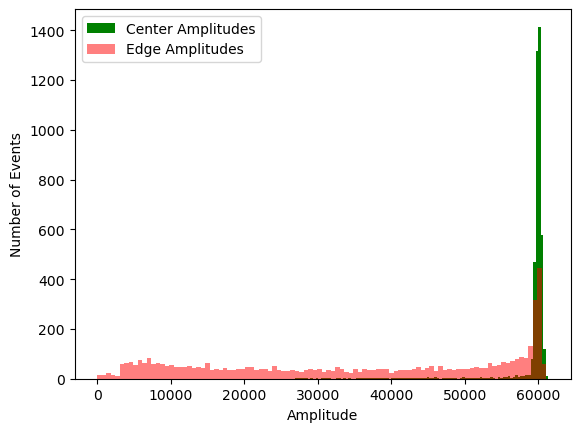

mean amplitude center: 59292.506708548615


In [31]:
X_sim = np.array(df['X'])
Y_sim = np.array(df['Y'])
amp_sim = np.array(df['s']) 
plt.figure()
amp_freq_sim = np.array(amp_sim)[(np.abs(X_sim)**2 + np.abs(Y_sim)**2 < .45)]
plt.hist(amp_freq_sim,bins=100,color='green', label='Center Amplitudes')
amp_freq_sim2 = np.array(amp_sim)[(np.array(X_sim)>0.7)|(np.array(X_sim)<-0.7)|(np.array(Y_sim)>0.6)|(np.array(Y_sim)<-0.6)]
plt.hist(amp_freq_sim2,bins=100,color='red',alpha=0.5, label='Edge Amplitudes')

plt.xlabel('Amplitude')
plt.ylabel('Number of Events')
plt.legend()
plt.show()
print('mean amplitude center:', np.mean(amp_freq_sim))
